In [25]:

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

# Data Manipulation
import pandas as pd
import numpy as np

# Statistics
from scipy import stats
from scipy.stats import chi2_contingency

# Additional libraries for similar functionality
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.stats.weightstats import DescrStatsW


#### A data set was analyize via SQL and new columns where added to help in the analysis
#### + Using this new dataset the Python Data Analysis will start

### Starting with EDA

In [26]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset_update.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,BMI Score,Daily Steps Score,Blood Pressure Category,Blood Pressure Score
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,126,83,3,5,Hypertensive Crisis,4
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80,2,2,Elevated,2
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80,2,2,Elevated,2
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,4,5,Hypertensive Crisis,4
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,4,5,Hypertensive Crisis,4


- **Person ID**: A unique identifier for each individual in the dataset.
- **Gender**: The gender of the individual
- **Age**: The age of the individual
- **Occupation**: The person's job or profession, which can affect various aspects of health, such as stress levels and physical activity.
- **Sleep Duration**: The average time the individual sleeps, measured in hours.
- **Quality of Sleep**: Quality of sleep from 1 to 10, 1 being the worst and 10 the best.
- **Physical Activity Level**: The level physical activity the person engages in, which can range 1 to 100.
- **Stress Level**: An assessment of the individual’s stress, from 1 to 10.
- **BMI Category**: The classification of the individual’s Body Mass Index (BMI) into categories such as underweight, normal, normal weight, overweight, or obese.
- **Blood Pressure**: The measure of the force of blood against the walls of the arteries, typically recorded as systolic/diastolic values.
- **Heart Rate**: The number of heartbeats per minute, an important indicator of cardiovascular health.
- **Daily Steps**: The number of steps an individual takes in a day, often measured by pedometers or fitness trackers.
- **Sleep Disorder**: Any condition or issue related to sleep, such as insomnia or sleep apnea, that affects the individual’s sleep quality.
- **Systolic**: The higher value in a blood pressure reading, representing the pressure in the arteries when the heart beats.
- **Diastolic**: The lower value in a blood pressure reading, representing the pressure in the arteries when the heart is at rest between beats.
- **BMI Score**: A numerical value calculated from a person’s height and weight to assess whether they are underweight, normal, normal weight, overweight, or obese.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
 13  Systolic                 374 non-null    int64  
 14  Diastolic                3

In [4]:
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Systolic                   0
Diastolic                  0
BMI Score                  0
Daily Steps Score          0
Blood Pressure Category    0
Blood Pressure Score       0
dtype: int64

In [5]:
gender_numbers = data.groupby('Gender').size()
gender_numbers

Gender
Female    185
Male      189
dtype: int64

From this Number we can see the split is almost igual which can give us the insight for the Sleep Health in both genders

Text(0, 0.5, '')

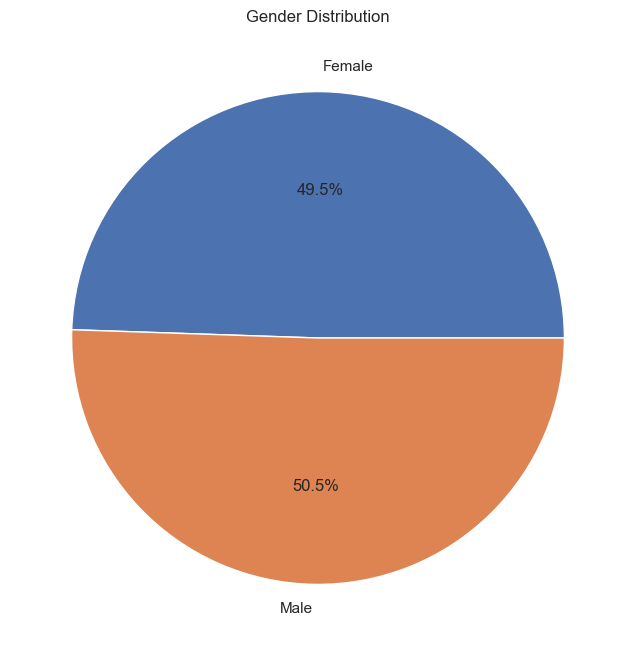

In [6]:
sns.set(style='whitegrid')

# Create a bar plot
gender_numbers.plot(kind= 'pie' , figsize=(12,8), autopct='%1.1f%%')

# Add titles and labels
plt.title('Gender Distribution')

# Remove the ylabel 
plt.ylabel('')


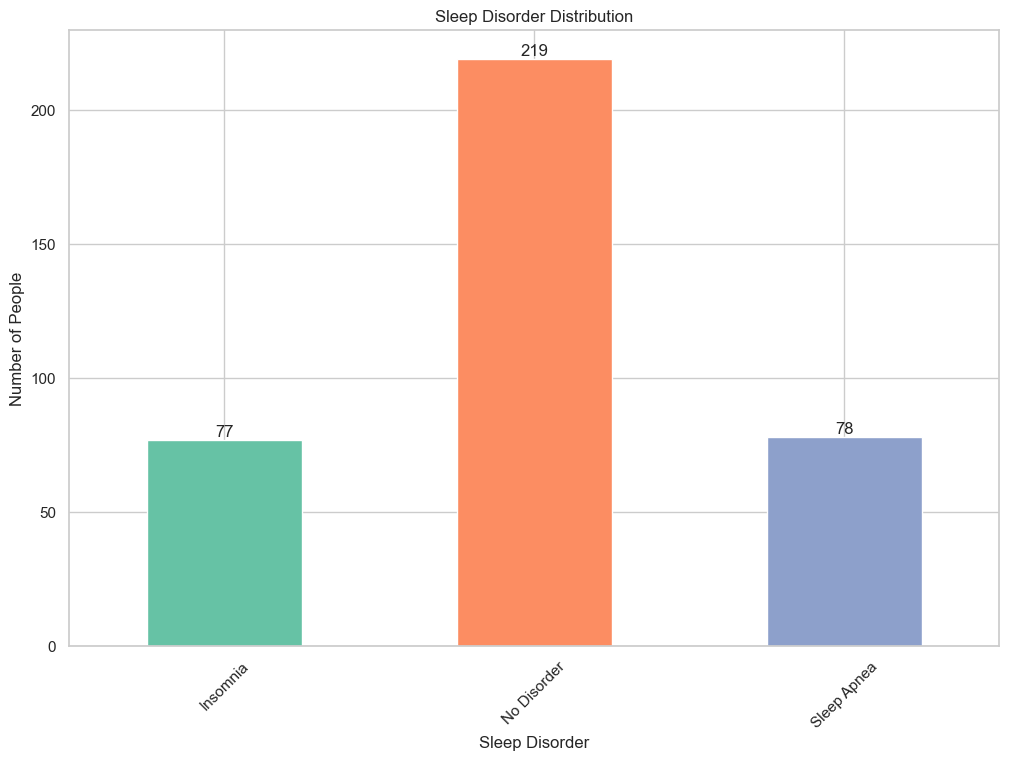

In [7]:
sleep_disorder = data.groupby('Sleep Disorder').size()
sleep_disorder

#creating the graph
sns.set(style='whitegrid')

# Create a list of colors (you can customize this list or use matplotlib's color palette)
colors = sns.color_palette("Set2", len(sleep_disorder))

# Create a bar plot
sleep_disorder.plot(kind= 'bar' , figsize=(12,8), color = colors)

# Add titles and labels
plt.title('Sleep Disorder Distribution')
plt.ylabel('Number of People')
plt.xlabel('Sleep Disorder')
plt.xticks(rotation=45)

# Display the count values on top of the bars
for i, v in enumerate(sleep_disorder):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=12)

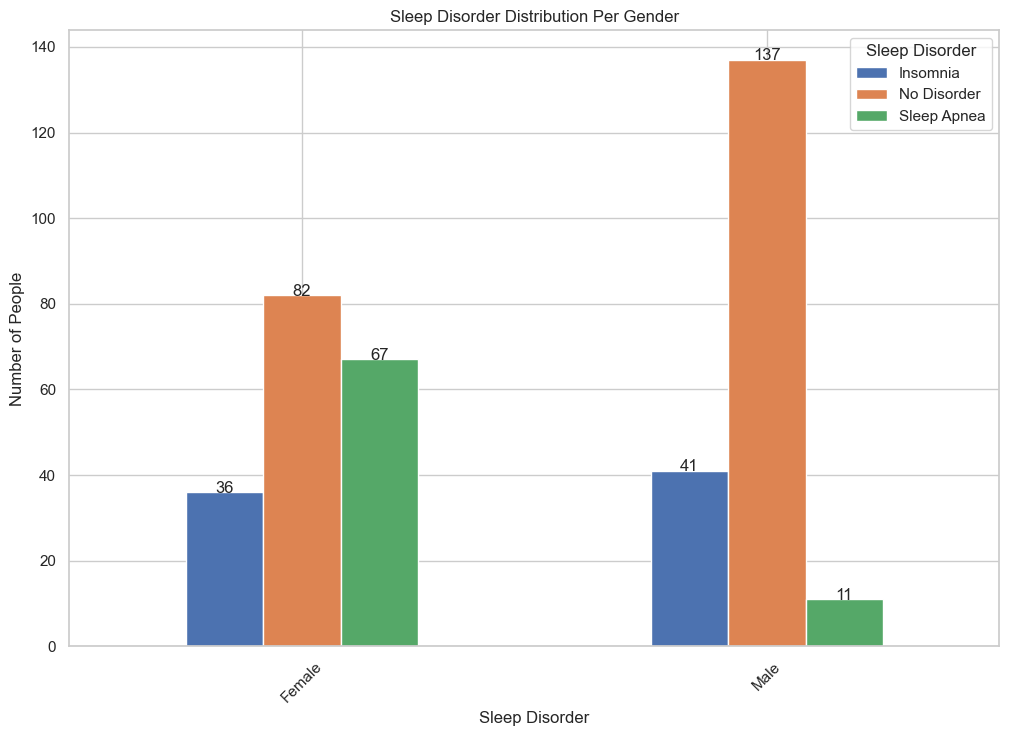

In [8]:
sleep_disorder_gender = data.groupby(['Gender', 'Sleep Disorder']).size().unstack()
sleep_disorder_gender


sns.set(style='whitegrid')

sdg = sleep_disorder_gender.plot(kind='bar', figsize=(12,8))

# Add titles and labels
plt.title('Sleep Disorder Distribution Per Gender')
plt.ylabel('Number of People')
plt.xlabel('Sleep Disorder')
plt.xticks(rotation=45)

# Display the count values on top of the bars
# Display the count values on top of the bars
for p in sdg.patches:
    sdg.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, 
                xytext=(0, 3), textcoords='offset points') 


C:\Users\Khaled\AppData\Local\Temp\ipykernel_21944\3053279021.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



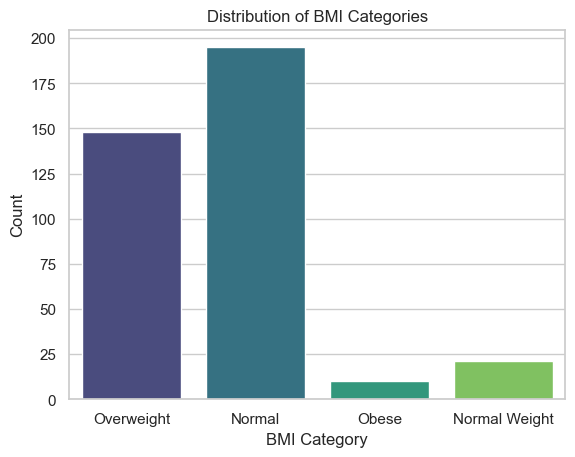

In [9]:
# Countplot for BMI Categories
sns.countplot(x='BMI Category', data=data, palette='viridis')
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

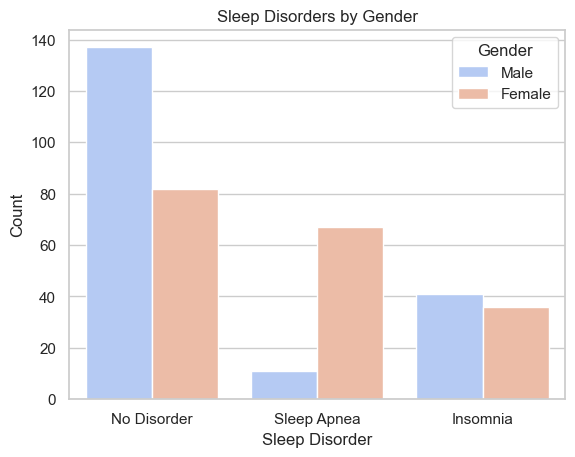

In [10]:
# Countplot for Sleep Disorders by Gender
sns.countplot(x='Sleep Disorder', hue='Gender', data=data, palette='coolwarm')
plt.title('Sleep Disorders by Gender')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.show()

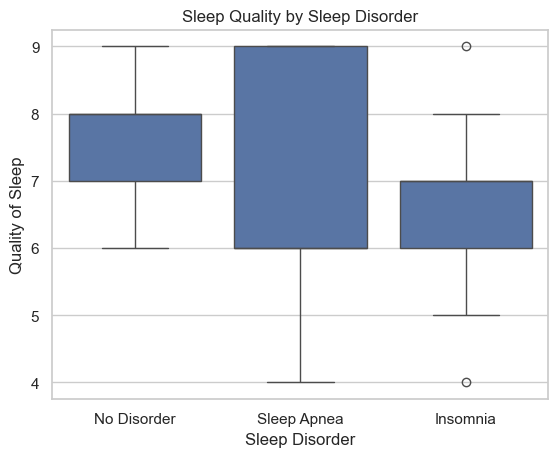

In [11]:
# Boxplot for Sleep Quality by Sleep Disorder
sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', data=data)
plt.title('Sleep Quality by Sleep Disorder')
plt.show()

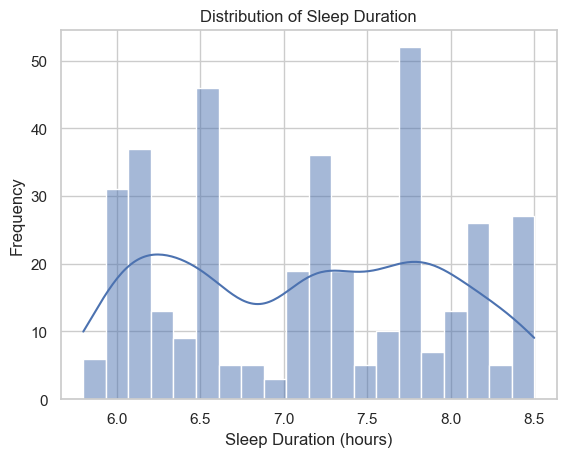

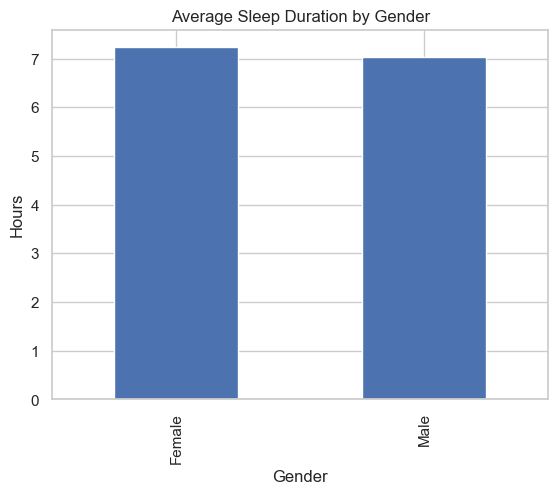

In [12]:
# Visualize sleep duration distribution
sns.histplot(data['Sleep Duration'], bins=20, kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# Compare average sleep duration across gender groups
data.groupby('Gender')['Sleep Duration'].mean().plot(kind='bar')
plt.title('Average Sleep Duration by Gender')
plt.ylabel('Hours')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(Female, Normal)'),
  Text(1, 0, '(Female, Normal Weight)'),
  Text(2, 0, '(Female, Obese)'),
  Text(3, 0, '(Female, Overweight)'),
  Text(4, 0, '(Male, Normal)'),
  Text(5, 0, '(Male, Normal Weight)'),
  Text(6, 0, '(Male, Obese)'),
  Text(7, 0, '(Male, Overweight)')])

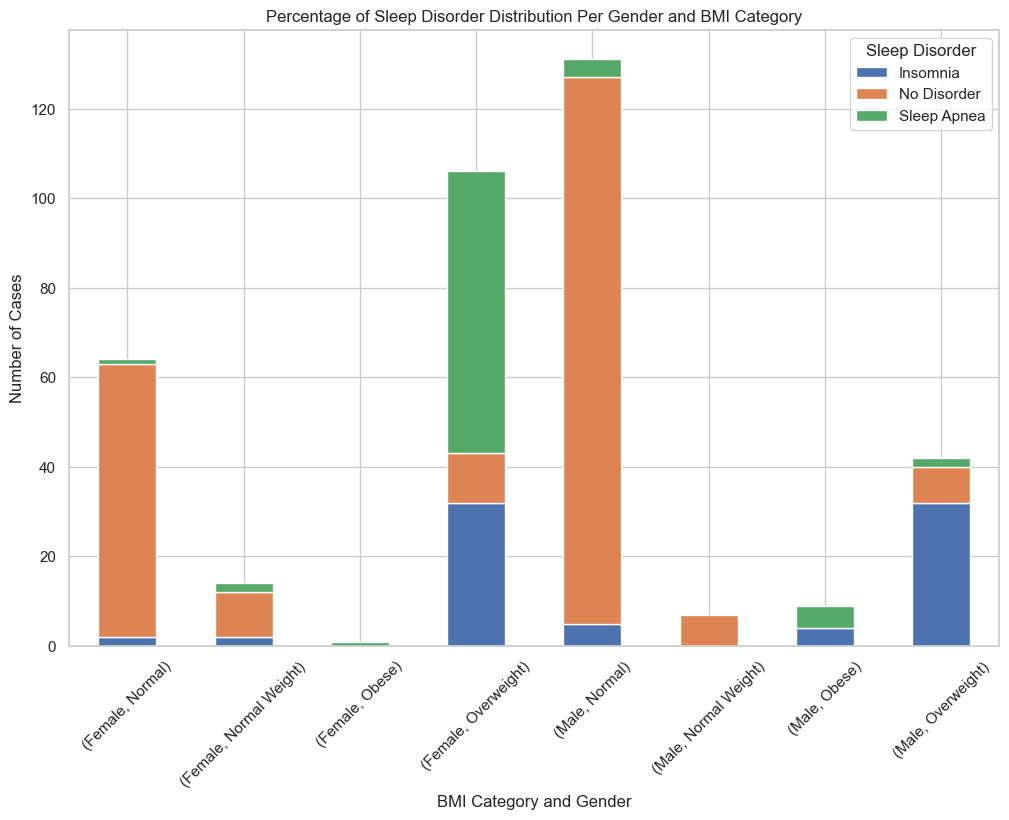

In [13]:
gender_bmi_disorder = data.groupby(['Gender', "BMI Category", 'Sleep Disorder']).size().unstack()
gender_bmi_disorder

# Create a stacked bar chart for percentages
ax = gender_bmi_disorder.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add titles and labels
plt.title('Percentage of Sleep Disorder Distribution Per Gender and BMI Category')
plt.ylabel('Number of Cases')
plt.xlabel('BMI Category and Gender')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(Female, Normal)'),
  Text(1, 0, '(Female, Normal Weight)'),
  Text(2, 0, '(Female, Obese)'),
  Text(3, 0, '(Female, Overweight)'),
  Text(4, 0, '(Male, Normal)'),
  Text(5, 0, '(Male, Normal Weight)'),
  Text(6, 0, '(Male, Obese)'),
  Text(7, 0, '(Male, Overweight)')])

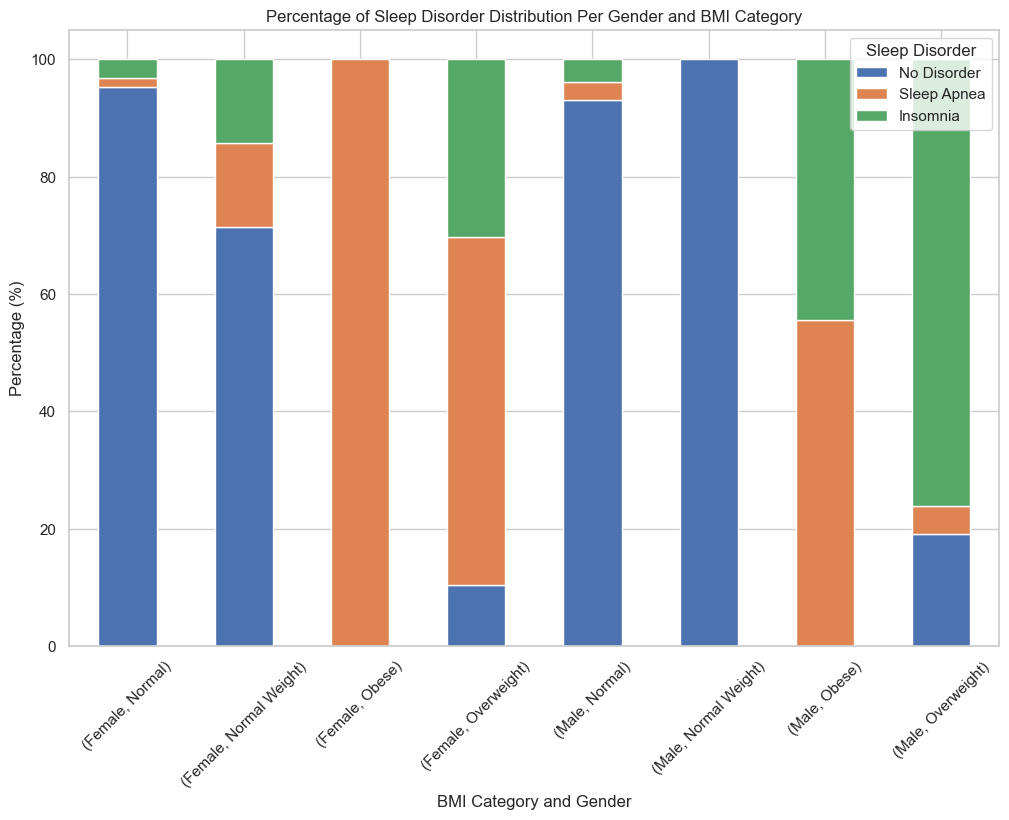

In [14]:
gender_bmi_disorder = data.groupby(['Gender', "BMI Category", 'Sleep Disorder']).size().unstack()
gender_bmi_disorder

# Normalize to calculate the percentage within each group
gender_bmi_disorder_percentage = gender_bmi_disorder.div(gender_bmi_disorder.sum(axis=1), axis=0) * 100

# Reorder the columns so that 'No Disorder' is at the bottom
ordered_columns = ['No Disorder', 'Sleep Apnea', 'Insomnia']

# Reorder the columns
gender_bmi_disorder_percentage = gender_bmi_disorder_percentage[ordered_columns]

# Create a stacked bar chart for percentages
ax = gender_bmi_disorder_percentage.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add titles and labels
plt.title('Percentage of Sleep Disorder Distribution Per Gender and BMI Category')
plt.ylabel('Percentage (%)')
plt.xlabel('BMI Category and Gender')
plt.xticks(rotation=45)


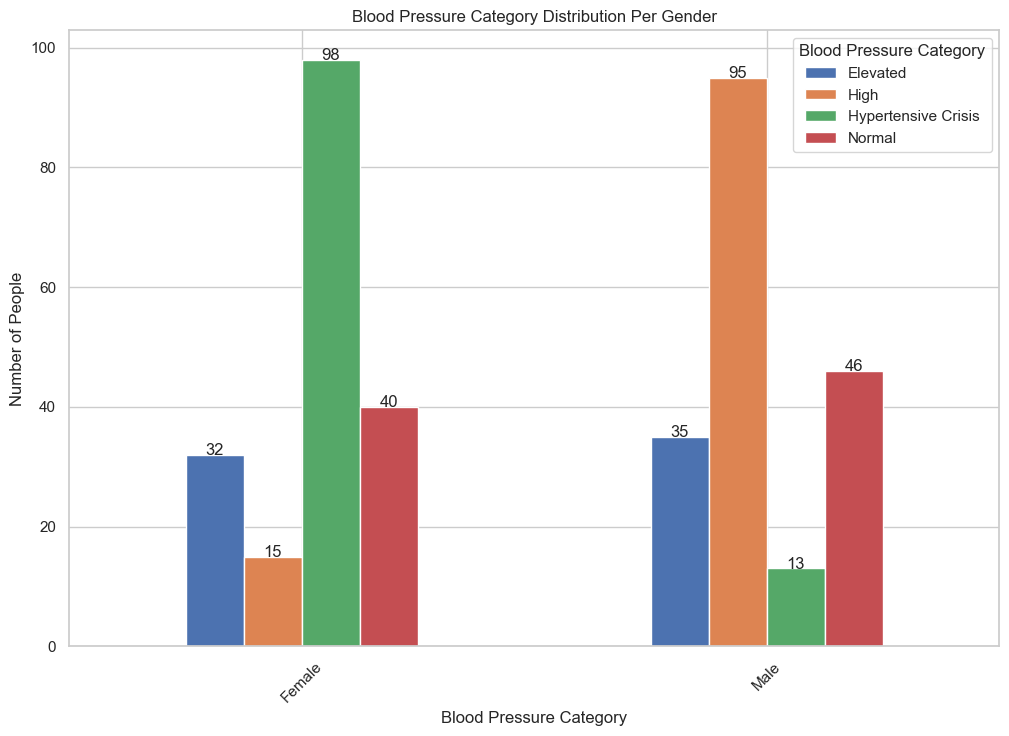

In [15]:
bb_gender = data.groupby(['Gender', 'Blood Pressure Category']).size().unstack()
bb_gender


sns.set(style='whitegrid')

bbg = bb_gender.plot(kind='bar', figsize=(12,8))

# Add titles and labels
plt.title('Blood Pressure Category Distribution Per Gender')
plt.ylabel('Number of People')
plt.xlabel('Blood Pressure Category')
plt.xticks(rotation=45)

# Display the count values on top of the bars
# Display the count values on top of the bars
for p in bbg.patches:
    bbg.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, 
                xytext=(0, 3), textcoords='offset points') 

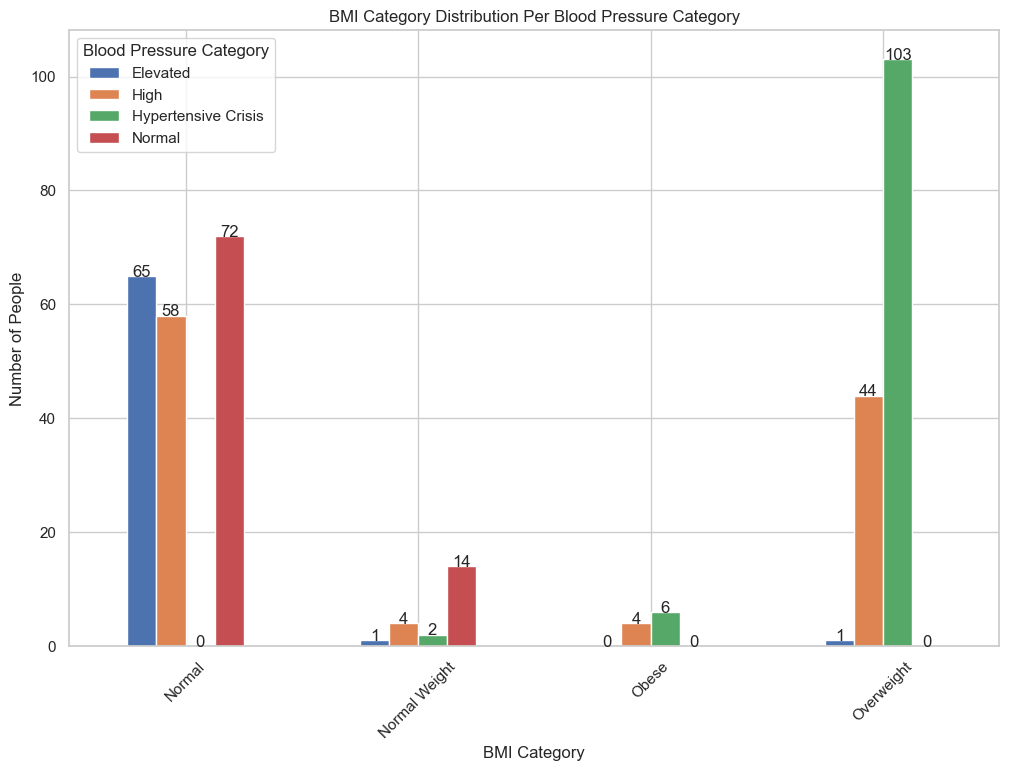

In [16]:
bb_bmi = data.groupby(['BMI Category', 'Blood Pressure Category']).size().unstack()
bb_bmi


sns.set(style='whitegrid')

bbbmi = bb_bmi.plot(kind='bar', figsize=(12,8))

# Add titles and labels
plt.title('BMI Category Distribution Per Blood Pressure Category')
plt.ylabel('Number of People')
plt.xlabel('BMI Category')
plt.xticks(rotation=45)

# Display the count values on top of the bars
# Display the count values on top of the bars
for p in bbbmi.patches:
    bbbmi.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, 
                xytext=(0, 3), textcoords='offset points') 

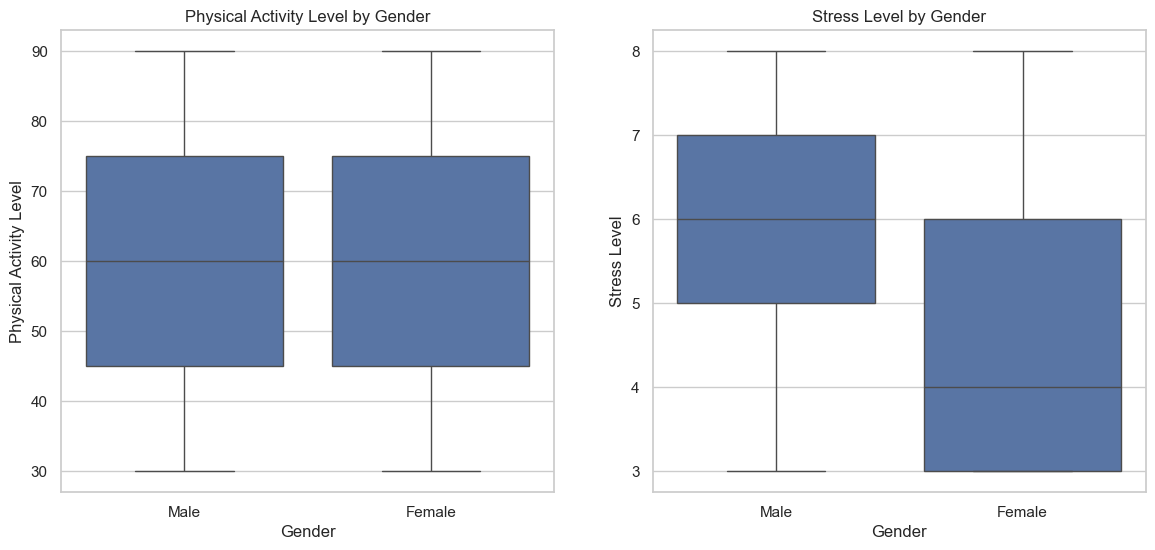

In [17]:
# Boxplots for Physical Activity Level and Stress Level by Gender
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='Gender', y='Physical Activity Level', data=data, ax=axes[0])
axes[0].set_title('Physical Activity Level by Gender')

sns.boxplot(x='Gender', y='Stress Level', data=data, ax=axes[1])
axes[1].set_title('Stress Level by Gender')
plt.show()

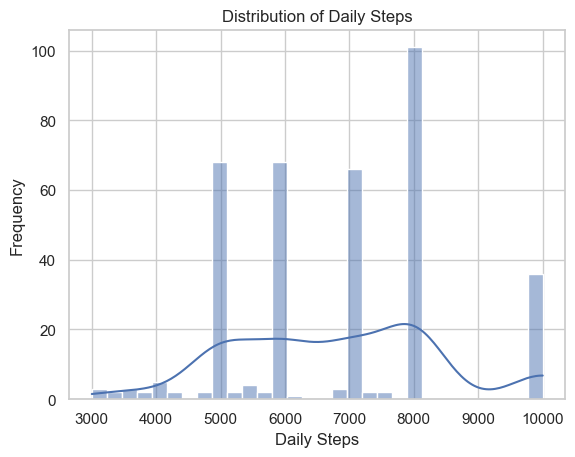

In [27]:
# Distribution of Daily Steps
sns.histplot(data['Daily Steps'], bins=30, kde=True)
plt.title('Distribution of Daily Steps')
plt.xlabel('Daily Steps')
plt.ylabel('Frequency')
plt.show()

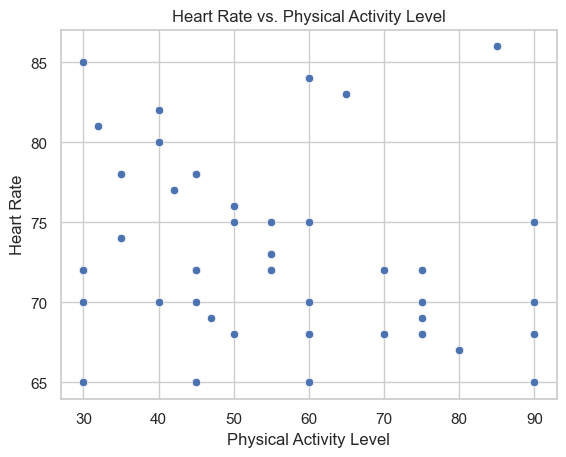

In [28]:
# Scatterplot for Heart Rate vs. Physical Activity Level

sns.scatterplot(x='Physical Activity Level', y='Heart Rate', data=data)
plt.title('Heart Rate vs. Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Heart Rate')
plt.show()



<Axes: xlabel='Physical Activity Level', ylabel='Heart Rate'>

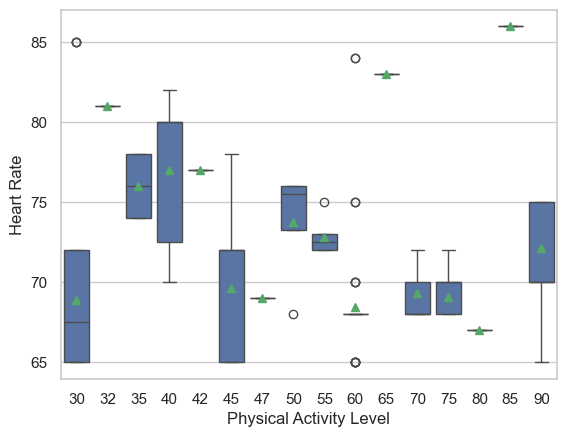

In [55]:
sns.boxplot(x="Physical Activity Level", y="Heart Rate", showmeans=True, data=data)

let's have an overview of the dataset and identifies unusual data points (outliers) that may require handling during cleaning.

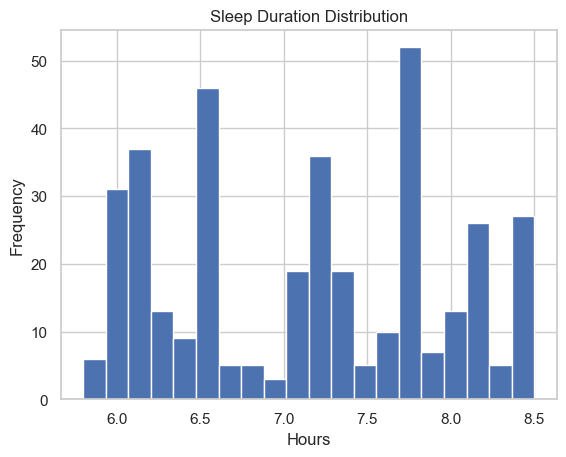

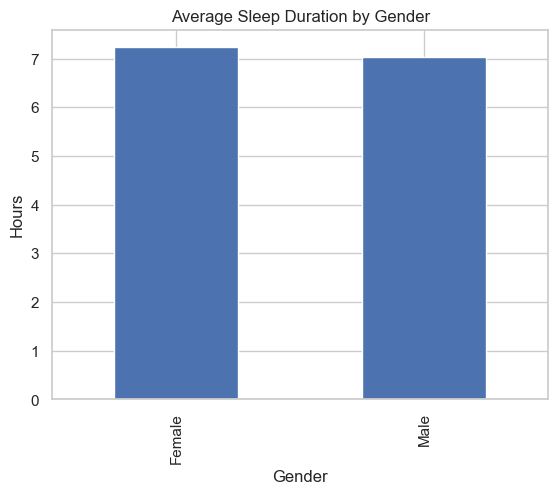

In [20]:
# Visualize sleep duration distribution
data['Sleep Duration'].hist(bins=20)
plt.title('Sleep Duration Distribution')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

# Compare average sleep duration across gender groups
data.groupby('Gender')['Sleep Duration'].mean().plot(kind='bar')
plt.title('Average Sleep Duration by Gender')
plt.ylabel('Hours')
plt.show()

how various lifestyle factor impact sleep quality, helping identify significant predictors of good or poor sleep.

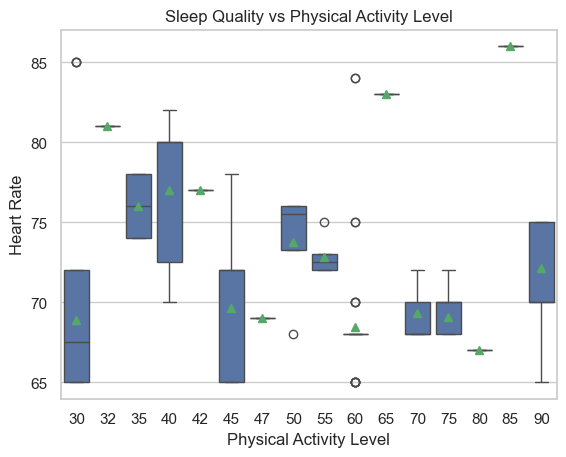

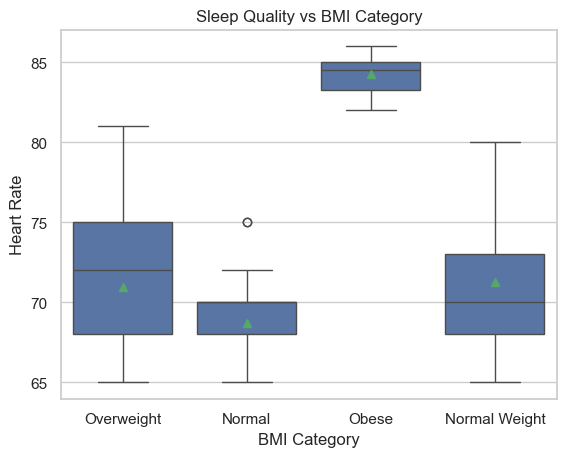

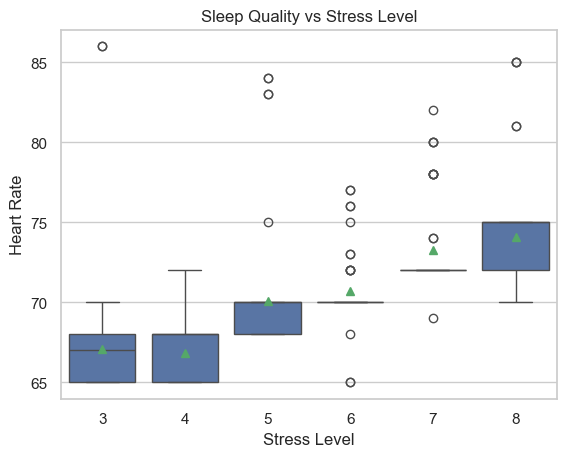

In [58]:
lifestyle_factors = ['Physical Activity Level', 'BMI Category', 'Stress Level']
for factor in lifestyle_factors:
    sns.boxplot(x=factor, y="Heart Rate", showmeans=True, data=data)
    plt.title(f'Sleep Quality vs {factor}')
    plt.show()

In [146]:
# # Explore relationships between lifestyle factors and sleep quality
# lifestyle_factors = ['Physical Activity Level', 'BMI Category', 'Stress Level']
# for factor in lifestyle_factors:
#     sns.scatterplot(x=factor, y='Quality of Sleep', data=data)
#     plt.title(f'Sleep Quality vs {factor}')
#     plt.show()

7. Correlation Analysis

To start with the correlation analysis we need to transfer the data from categorial to numerical one
also some column where drope due to repetition or irrelvant to this analysis

In [77]:
from sklearn.preprocessing import LabelEncoder
#droping colum that does not help the analysis
df = data.drop(['Person ID', 'Occupation', 'BMI Category', 'Blood Pressure Category','Blood Pressure','Systolic','Diastolic'], axis=1)

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Gender' column
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})

#mapping the sleep disorders
df['Sleep Disorder'] = df['Sleep Disorder'].map({'No Disorder': 0, 'Sleep Apnea': 1, 'Insomnia':2})
df.head(10)


,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,BMI Score,Daily Steps Score,Blood Pressure Score
0,1,27,6.1,6,42,6,77,4200,0,3,5,4
1,1,28,6.2,6,60,8,75,10000,0,2,2,2
2,1,28,6.2,6,60,8,75,10000,0,2,2,2
3,1,28,5.9,4,30,8,85,3000,1,4,5,4
4,1,28,5.9,4,30,8,85,3000,1,4,5,4
5,1,28,5.9,4,30,8,85,3000,2,4,5,4
6,1,29,6.3,6,40,7,82,3500,2,4,5,4
7,1,29,7.8,7,75,6,70,8000,0,2,3,1
8,1,29,7.8,7,75,6,70,8000,0,2,3,1
9,1,29,7.8,7,75,6,70,8000,0,2,3,1


#### Studying the corrolation between the cariable and the sleep quality

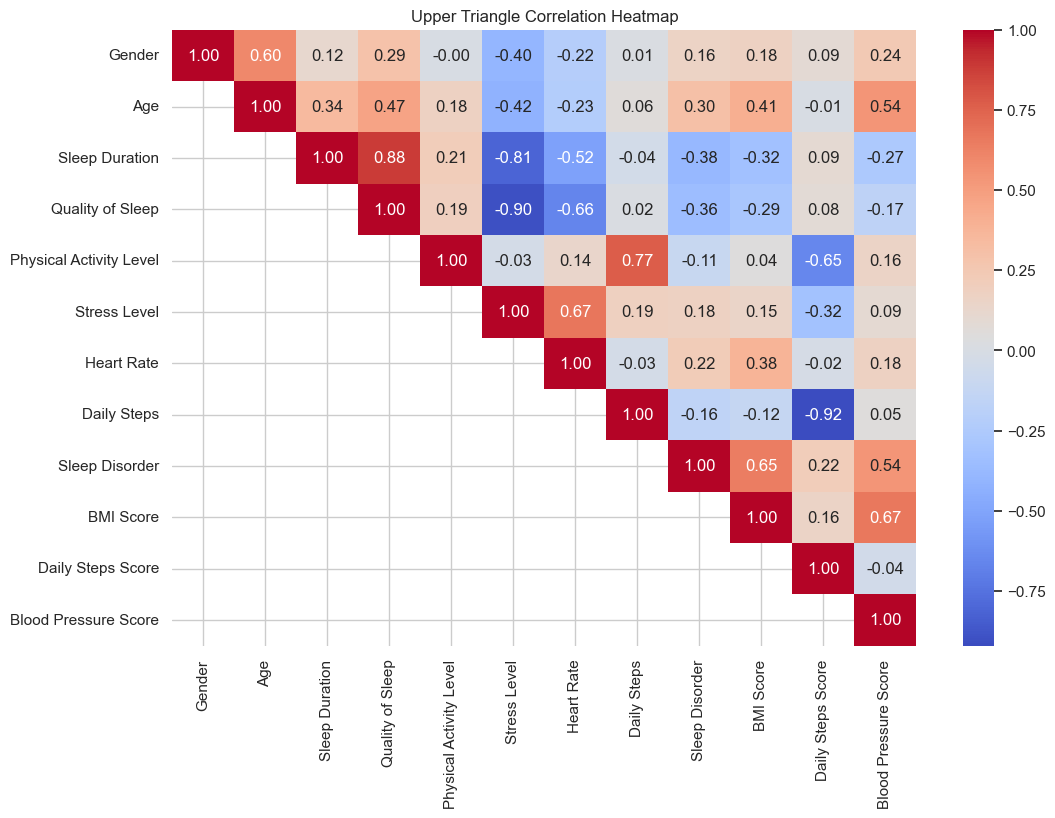

In [85]:
# Correlation heatmap for numeric variables
correlation_matrix = df.corr()
# Create a mask for the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, mask=~mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Upper Triangle Correlation Heatmap')
plt.show()


**Sleep Quality and Its Correlations**

The correlation heatmap provides valuable insights into the relationship between sleep quality and other health factors. Here are some key takeaways:

**Strong Positive Correlation:**

* **Sleep Duration and Quality of Sleep:** A strong positive correlation (0.88) exists between these two factors. This suggests that longer sleep duration tends to lead to better sleep quality. 

**Strong Negative Correlations:**

* **Quality of Sleep and Stress Level:** A strong negative correlation (-0.90) indicates that individuals with better sleep quality tend to experience lower levels of stress. 

**Moderate Correlations:**

* **Age and Quality of Sleep:** A moderate negative correlation suggests that as age increases, sleep quality may decline.

**Implications:**

These correlations emphasize the crucial role of sleep quality in overall health. Factors like sleep duration, stress, and age can significantly influence sleep quality, which in turn can impact various aspects of health and well-being. 

**Note:** While these correlations suggest potential relationships, further research is needed to establish causation.

8. Advanced Clustering
K-Means Clustering on Sleep and Lifestyle Factors

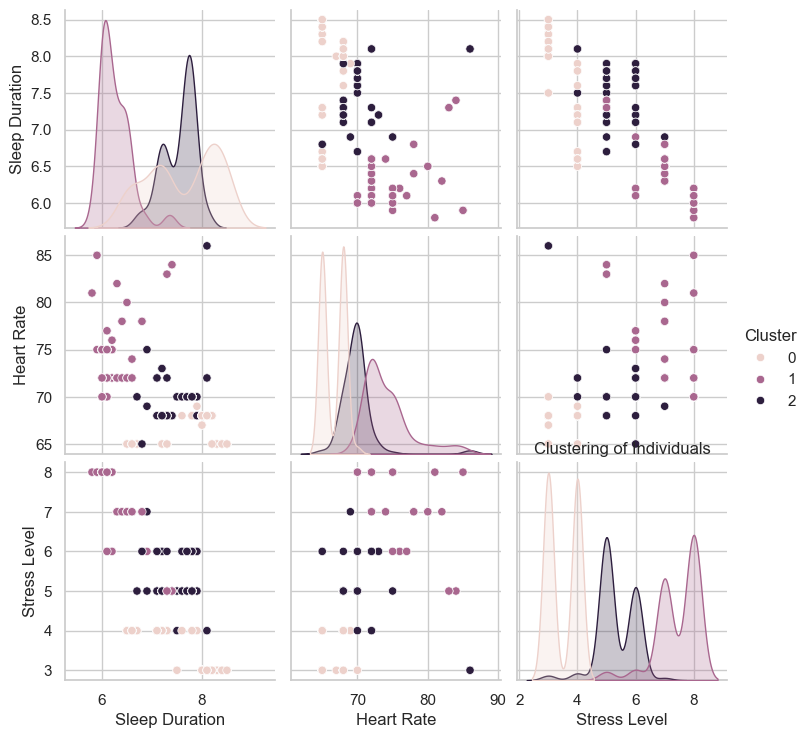

In [86]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
features = ['Sleep Duration', 'Heart Rate', 'Stress Level']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
sns.pairplot(data, hue='Cluster', vars=features)
plt.title('Clustering of Individuals')
plt.show()

**This graph shows the relationship between sleep duration, heart rate, stress level, and clustering of individuals.**

**Observations:**

* **Sleep Duration:** The distribution of sleep duration is right-skewed, with most individuals sleeping between 6 and 7 hours per night.
* **Heart Rate:** The distribution of heart rate is also right-skewed, with most individuals having a resting heart rate between 70 and 80 beats per minute.
* **Stress Level:** The distribution of stress level is left-skewed, with most individuals reporting a stress level between 5 and 6.
* **Clustering of Individuals:** The graph shows three clusters of individuals based on their sleep duration, heart rate, and stress level.

**Interpretation:**

* **Cluster 0:** Individuals in this cluster tend to have shorter sleep duration, higher heart rate, and higher stress level.
* **Cluster 1:** Individuals in this cluster tend to have longer sleep duration, lower heart rate, and lower stress level.
* **Cluster 2:** Individuals in this cluster tend to have intermediate sleep duration, heart rate, and stress level.

**Possible Insights:**

* **Sleep Duration:** Longer sleep duration may be associated with lower heart rate and stress level.
* **Heart Rate:** Higher heart rate may be associated with higher stress level.
* **Stress Level:** Higher stress level may be associated with shorter sleep duration and higher heart rate.

**Further Analysis:**

* **Correlation:** It would be interesting to calculate the correlation between sleep duration, heart rate, and stress level to quantify the strength of the relationships.
* **Regression:** A regression analysis could be performed to predict stress level based on sleep duration and heart rate.
* **Time Series:** If the data is collected over time, a time series analysis could be performed to identify trends and patterns in sleep duration, heart rate, and stress level.
* **Additional Variables:** Other variables, such as age, gender, and lifestyle factors, could be included in the analysis to further explain the relationships between sleep duration, heart rate, and stress level.

**Overall, this graph provides valuable insights into the relationship between sleep duration, heart rate, and stress level. Further analysis is needed to fully understand the underlying mechanisms and to develop interventions to improve sleep quality, reduce heart rate, and lower stress level.**

**Please note:** This is just one possible interpretation of the graph. Further analysis is needed to draw definitive conclusions.

+ Feature Importance
+ Using Random Forest to Identify Key Predictors of Sleep Quality

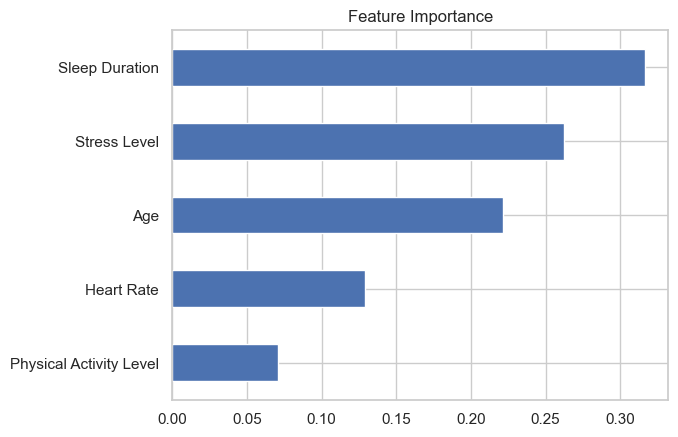

              precision    recall  f1-score   support

           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        26
           7       1.00      0.88      0.93        16
           8       0.90      1.00      0.95        18
           9       1.00      1.00      1.00        12

    accuracy                           0.97        75
   macro avg       0.98      0.98      0.98        75
weighted avg       0.98      0.97      0.97        75



In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare features and target variable
X = data[['Sleep Duration', 'Heart Rate', 'Stress Level', 'Physical Activity Level','Age']]
y = data['Quality of Sleep']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature importance visualization
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Linear Regression
Use Case: Predicting a numeric target variable (e.g., Quality of Sleep) based on other numeric features.

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target
features = ['Sleep Duration', 'Heart Rate', 'Stress Level', 'Physical Activity Level','Age']
target = 'Quality of Sleep'

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': linear_model.coef_})
print(coefficients)


Mean Squared Error: 0.12973372675717312
R-squared: 0.9140051599093685
                   Feature  Coefficient
0           Sleep Duration     0.642969
1               Heart Rate    -0.039616
2             Stress Level    -0.280201
3  Physical Activity Level     0.005527
4                      Age     0.014145


## Model Performance and Feature Importance

### Model Performance Metrics

* **Mean Squared Error (MSE):** 0.12973372675717312
  * Measures the average squared difference between predicted and actual values.
  * Lower MSE indicates better model performance.
* **R-squared:** 0.9140051599093685
  * Represents the proportion of variance in the dependent variable explained by the independent variables.
  * Higher R-squared indicates a better model fit.

### Feature Importance

The model assigns importance to each feature based on its contribution to the prediction. Here are the top features:

1. **Sleep Duration:** A positive coefficient suggests that longer sleep duration is associated with a higher predicted outcome (e.g., better sleep quality).
2. **Stress Level:** A negative coefficient suggests that higher stress levels are associated with a lower predicted outcome.
3. **Heart Rate:** A negative coefficient suggests that higher heart rates are associated with a lower predicted outcome.
4. **Age:** A small positive coefficient suggests a minimal positive impact of age on the predicted outcome.
5. **Physical Activity Level:** A very small positive coefficient suggests a minimal positive impact of physical activity level on the predicted outcome.

**Interpretation:**

The model suggests that **sleep duration** and **stress level** are the most significant factors influencing the predicted outcome. Longer sleep duration and lower stress levels are associated with a better outcome.

Machine Learning Models
You can apply machine learning models for either classification or regression depending on the target variable.

a. Classification
If the target variable is categorical (e.g., Sleep Disorder), use models like Logistic Regression, Random Forest, or Support Vector Machines.

Logistic Regression

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

# # Target: Sleep Disorder (binary classification)
# X = data[['Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Daily Steps']]
# y = data['Sleep Disorder'].apply(lambda x: 1 if x == 'Sleep Apnea' else (2 if x == 'Insomnia' else 0))

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Logistic regression
# logistic_model = LogisticRegression()
# logistic_model.fit(X_train, y_train)

# # Predictions and evaluation
# y_pred = logistic_model.predict(X_test)
# print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# print(classification_report(y_test, y_pred))


Accuracy: 0.48
              precision    recall  f1-score   support

           0       0.56      0.72      0.63        43
           1       0.57      0.25      0.35        16
           2       0.08      0.06      0.07        16

    accuracy                           0.48        75
   macro avg       0.40      0.34      0.35        75
weighted avg       0.46      0.48      0.45        75



c:\Users\Khaled\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [120]:
# Target: Sleep Disorder (binary classification)
X = data[['Sleep Duration', 'Heart Rate', 'Stress Level', 'Physical Activity Level', 'Age']]
y = data['Sleep Disorder'].apply(lambda x: 1 if x == 'Sleep Apnea' or x == 'Insomnia' else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = logistic_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.97      0.88      0.92        32

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



Doing the same test but with Age variale added

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Target: Sleep Disorder (binary classification)
X = data[['Sleep Duration', 'Heart Rate', 'Stress Level', 'Physical Activity Level', 'Age']]
y = data['Sleep Disorder'].apply(lambda x: 1 if x == 'Sleep Apnea' or x == 'Insomnia' else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = logistic_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.97      0.88      0.92        32

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



**Model Performance**

The provided model demonstrates strong performance across various evaluation metrics:

* **High Accuracy:** The model correctly predicts 93.33% of instances.
* **Balanced Precision and Recall:** The model achieves a good balance between precision and recall for both classes, indicating accurate positive predictions and minimal false positives and negatives.
* **Strong F1-Score:** The F1-score, which balances precision and recall, is high for both classes, further confirming the model's overall effectiveness.

In [107]:
'''

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Target: Sleep Disorder (binary classification)
X = data[['Physical Activity Level', 'Stress Level', 'Daily Steps']]
y = data['Sleep Disorder'].apply(lambda x: 1 if x == 'Sleep Apnea' else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = logistic_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

'''


'\n\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score, classification_report\n\n# Target: Sleep Disorder (binary classification)\nX = data[[\'Physical Activity Level\', \'Stress Level\', \'Daily Steps\']]\ny = data[\'Sleep Disorder\'].apply(lambda x: 1 if x == \'Sleep Apnea\' else 0)\n\n# Train-test split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Logistic regression\nlogistic_model = LogisticRegression()\nlogistic_model.fit(X_train, y_train)\n\n# Predictions and evaluation\ny_pred = logistic_model.predict(X_test)\nprint(f"Accuracy: {accuracy_score(y_test, y_pred)}")\nprint(classification_report(y_test, y_pred))\n\n'

Random Forest


In [91]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.97      0.88      0.92        32

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



b. Regression
If the target variable is numeric (e.g., Quality of Sleep), use models like Decision Trees, Random Forest Regressors, or Gradient Boosting.

Random Forest Regressor

In [122]:
from sklearn.ensemble import RandomForestRegressor

# Target: Quality of Sleep (numeric regression)
X = data[['Sleep Duration', 'Heart Rate', 'Stress Level', 'Physical Activity Level', 'Age']]
y = data['Quality of Sleep']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Number of observations and features
n = len(y_test)
p = X_train.shape[1]

# Adjusted R-squared calculation
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
results_Randomforest = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared', 'Adjusted R-squared'],
    'Value': [mse, r2, adj_r2]
})

# Display the table
results_Randomforest


,Metric,Value
0,Mean Squared Error,0.016468
1,R-squared,0.989084
2,Adjusted R-squared,0.988293


In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# # Target: Quality of Sleep (numeric regression)
# X = data[['Physical Activity Level', 'Stress Level', 'Heart Rate', 'Sleep Duration', 'BMI Score', 'Blood Pressure Score']]
# y = data['Quality of Sleep']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a Random Forest Regressor
# rf_regressor = RandomForestRegressor(random_state=42)
# rf_regressor.fit(X_train, y_train)

# # Predictions and evaluation
# y_pred = rf_regressor.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Number of observations and features
# n = len(y_test)
# p = X_train.shape[1]

# # Adjusted R-squared calculation
# adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# # Print results
# results_Randomforest = pd.DataFrame({
#     'Metric': ['Mean Squared Error', 'R-squared', 'Adjusted R-squared'],
#     'Value': [mse, r2, adj_r2]
# })

# # Display the table
# results_Randomforest


,Metric,Value
0,Mean Squared Error,0.015957
1,R-squared,0.989423
2,Adjusted R-squared,0.988489


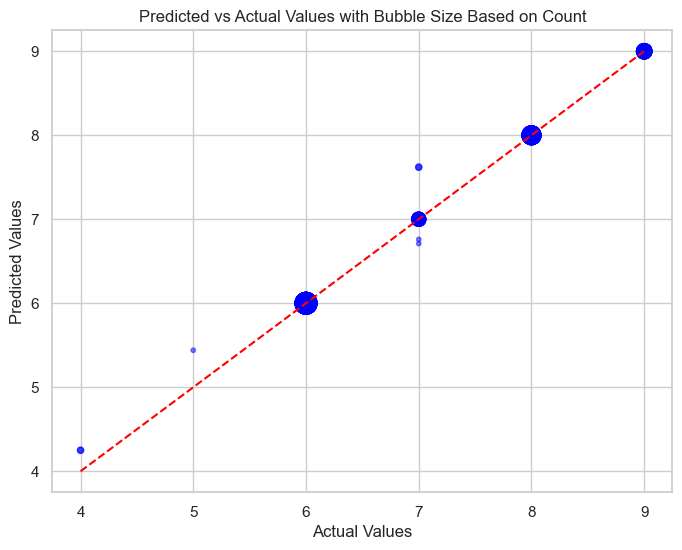

In [123]:
# Assuming y_test and y_pred are already defined as the actual and predicted values
# Create a DataFrame with y_test and y_pred
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Count the occurrences of each predicted value (or you can use another criterion)
count_series = df['Predicted'].value_counts()

# Map these counts to the size of the bubbles (e.g., larger counts will correspond to larger bubbles)
df['Count'] = df['Predicted'].map(count_series)

# Plot Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(df['Actual'], df['Predicted'], s=df['Count'] * 10, color='blue', alpha=0.5)
plt.plot([df['Actual'].min(), df['Actual'].max()], [df['Actual'].min(), df['Actual'].max()], color='red', linestyle='--')
plt.title('Predicted vs Actual Values with Bubble Size Based on Count')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

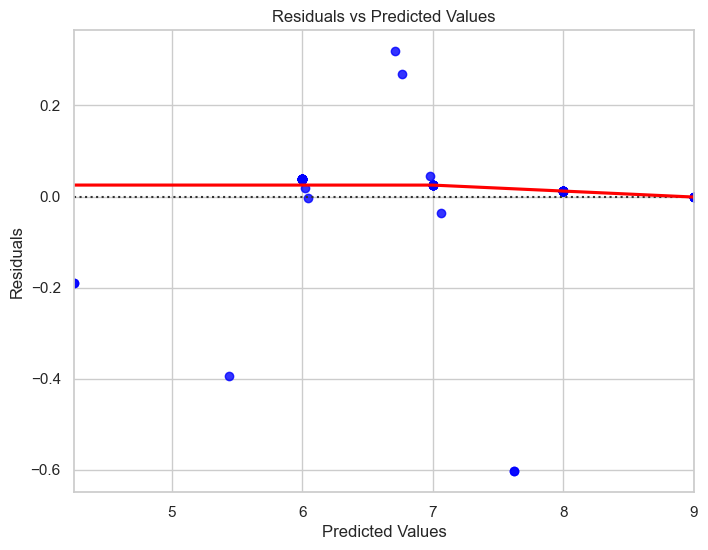

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="blue", line_kws={'color': 'red'})
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()




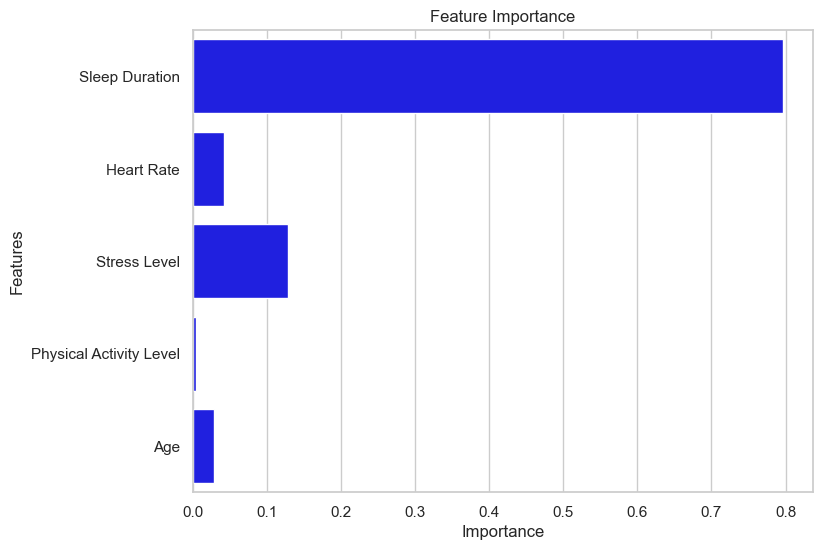

In [125]:
# Feature importance plot
importances = rf_regressor.feature_importances_
features = X.columns

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features, color='blue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


running the analysis again whout sleep duration

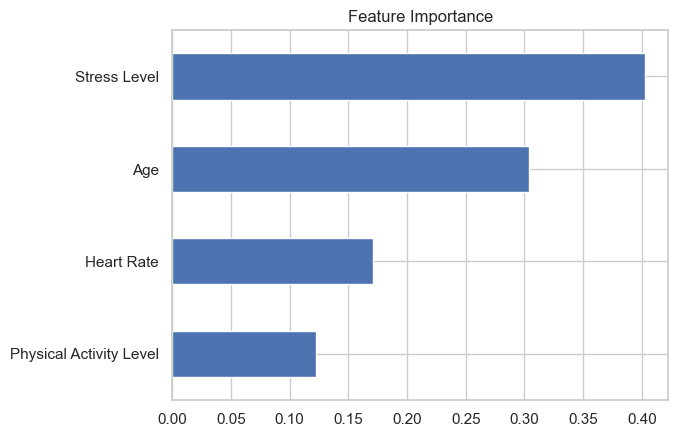

              precision    recall  f1-score   support

           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        26
           7       1.00      0.88      0.93        16
           8       0.90      1.00      0.95        18
           9       1.00      1.00      1.00        12

    accuracy                           0.97        75
   macro avg       0.98      0.98      0.98        75
weighted avg       0.98      0.97      0.97        75



In [135]:
# Prepare features and target variable
X = data[['Heart Rate', 'Stress Level', 'Physical Activity Level','Age']]
y = data['Quality of Sleep']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature importance visualization
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [136]:
# Define the features and target
features = ['Heart Rate', 'Stress Level', 'Physical Activity Level','Age']
target = 'Quality of Sleep'

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': linear_model.coef_})
print(coefficients)

Mean Squared Error: 0.1722242466338304
R-squared: 0.8858400439175942
                   Feature  Coefficient
0               Heart Rate    -0.038215
1             Stress Level    -0.516166
2  Physical Activity Level     0.010167
3                      Age     0.012336


In [137]:
X = data[['Heart Rate', 'Stress Level', 'Physical Activity Level', 'Age']]
y = data['Sleep Disorder'].apply(lambda x: 1 if x == 'Sleep Apnea' or x == 'Insomnia' else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = logistic_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.89      0.78      0.83        32

    accuracy                           0.87        75
   macro avg       0.87      0.86      0.86        75
weighted avg       0.87      0.87      0.87        75



In [138]:
# Target: Sleep Disorder (binary classification)
X = data[['Heart Rate', 'Stress Level', 'Physical Activity Level', 'Age']]
y = data['Sleep Disorder'].apply(lambda x: 1 if x == 'Sleep Apnea' or x == 'Insomnia' else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = logistic_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.89      0.78      0.83        32

    accuracy                           0.87        75
   macro avg       0.87      0.86      0.86        75
weighted avg       0.87      0.87      0.87        75



In [139]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.97      0.88      0.92        32

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



In [141]:
# Target: Quality of Sleep (numeric regression)
X = data[['Heart Rate', 'Stress Level', 'Physical Activity Level', 'Age']]
y = data['Quality of Sleep']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Number of observations and features
n = len(y_test)
p = X_train.shape[1]

# Adjusted R-squared calculation
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
results_Randomforest = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared', 'Adjusted R-squared'],
    'Value': [mse, r2, adj_r2]
})

# Display the table
results_Randomforest

,Metric,Value
0,Mean Squared Error,0.014437
1,R-squared,0.990430
2,Adjusted R-squared,0.989883


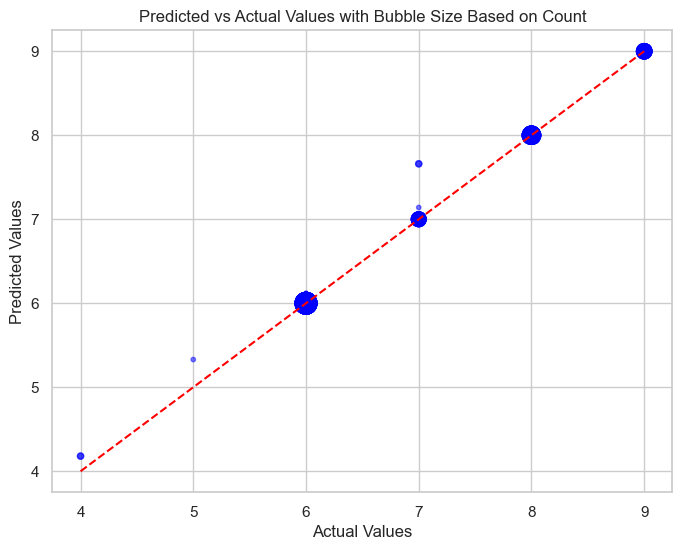

In [142]:
# Assuming y_test and y_pred are already defined as the actual and predicted values
# Create a DataFrame with y_test and y_pred
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Count the occurrences of each predicted value (or you can use another criterion)
count_series = df['Predicted'].value_counts()

# Map these counts to the size of the bubbles (e.g., larger counts will correspond to larger bubbles)
df['Count'] = df['Predicted'].map(count_series)

# Plot Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(df['Actual'], df['Predicted'], s=df['Count'] * 10, color='blue', alpha=0.5)
plt.plot([df['Actual'].min(), df['Actual'].max()], [df['Actual'].min(), df['Actual'].max()], color='red', linestyle='--')
plt.title('Predicted vs Actual Values with Bubble Size Based on Count')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

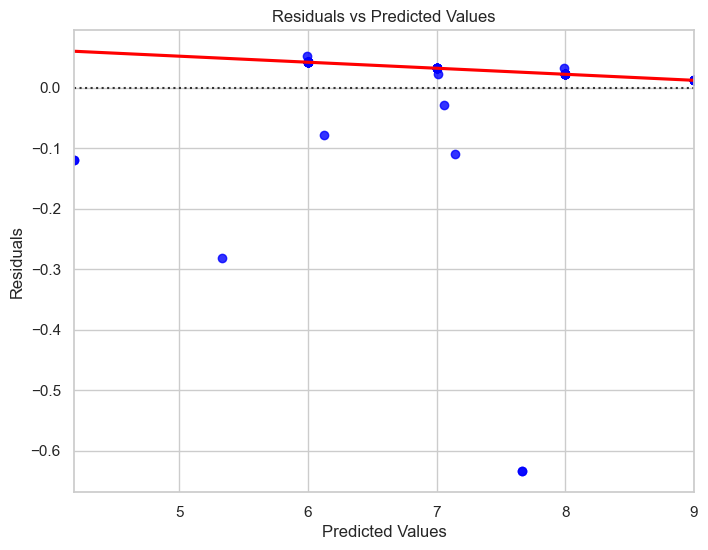

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="blue", line_kws={'color': 'red'})
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

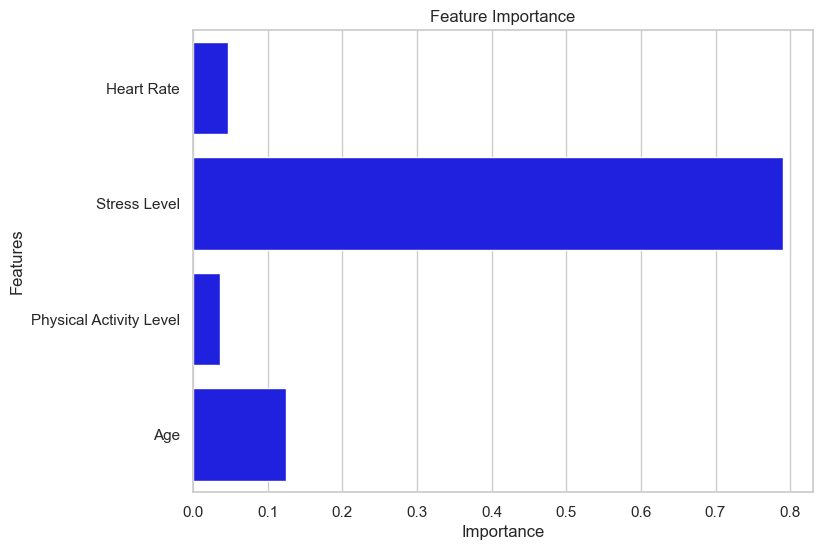

In [144]:
# Feature importance plot
importances = rf_regressor.feature_importances_
features = X.columns

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features, color='blue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
